In [39]:
import pandas as pd
import scipy, researchpy
from researchpy import ttest
import os
from glob2 import glob
import numpy as np
import json
import mpu.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
exp = ['1 reg',
'2a interp',
'3a atlas',
'4a resamp',
'4 n4',
'4 susan',
'4 hist',
'5 ss']
gbm_100 = [42.3,83.1,83.6,83.7,82.7,83.8,82.1,86.0]
gbm_300 = [43.6,84.8,84.6,85.0,82.4,84.5,83.3,86.6]
bgpd_100 = [34.1,70.2,71.6,71.4,71.7,70.9,72.0,75.3]
bgpd_300 = [35.9,72.3,74.9,73.4,74.6,73.6,74.6,75.7]
gbm_unetr = [39.3,81.7,81.8,82.7,80.0,82.7,81.1,85.0]
bgpd_unetr = [34.3,66.4,67.3,66.8, 68.4,68.8,67.7,71.5]

gbm_100_std = [0.27,0.13,0.12,0.13,0.13,0.12,0.17,0.11]
gbm_300_std = [0.28,0.11,0.11,0.12,0.13,0.12,0.16,0.11]
bgpd_100_std =[0.28,0.19,0.20,0.19,0.18,0.19,0.17,0.16]
bgpd_300_std = [0.29,0.19,0.17,0.18,0.18,0.18,0.17,0.15]
gbm_unetr_std = [0.26,0.13,0.13,0.12,0.13,0.13,0.16,0.11]
bgpd_unetr_std = [0.30,0.21,0.21,0.22,0.20,0.22,0.19,0.18]
df = pd.DataFrame({ 'GBM_100': gbm_100, 'BGPD_100': bgpd_100, 'GBM_300': gbm_300, 'BGPD_300': bgpd_300, 'GBM_unetr': gbm_unetr, 'BGPD_unetr': bgpd_unetr}, index=exp)

In [98]:
df.T

,1 reg,2a interp,3a atlas,4a resamp,4 n4,4 susan,4 hist,5 ss
GBM_100,42.3,83.1,83.6,83.7,82.7,83.8,82.1,86.0
BGPD_100,34.1,70.2,71.6,71.4,71.7,70.9,72.0,75.3
GBM_300,43.6,84.8,84.6,85.0,82.4,84.5,83.3,86.6
BGPD_300,35.9,72.3,74.9,73.4,74.6,73.6,74.6,75.7
GBM_unetr,39.3,81.7,81.8,82.7,80.0,82.7,81.1,85.0
BGPD_unetr,34.3,66.4,67.3,66.8,0.0,68.8,67.7,71.5


In [217]:
df[df.columns[2]][1:]

2a interp    84.8
3a atlas     84.6
4a resamp    85.0
4 n4         82.4
4 susan      84.5
4 hist       83.3
5 ss         86.6
Name: GBM_300, dtype: float64

In [588]:
np.std([45,45,46])

0.4714045207910317

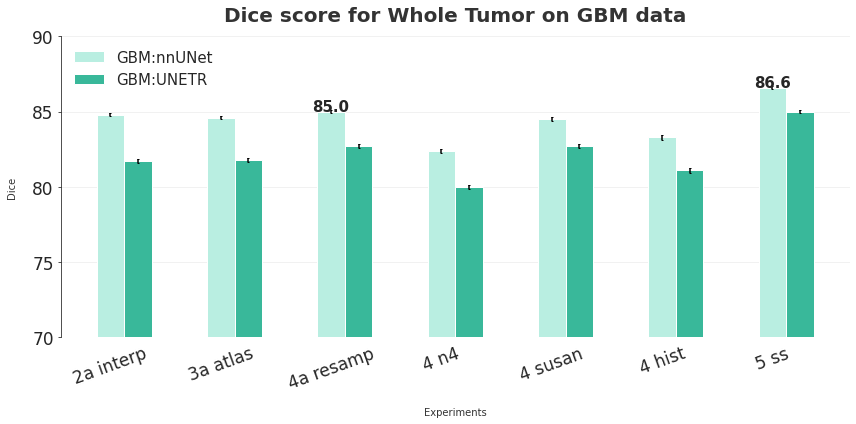

In [600]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
# plt.bar(x, df[df.columns[0]],
#         width, color='#DEF3F0', label=df.columns[0])
plt.bar(x, df[df.columns[2]][1:],
        width, color='#B9EEE1', label='GBM:nnUNet',yerr=gbm_300_std[1:],capsize=1)
ax.text(2-0.4,df[df.columns[2]][3],df[df.columns[2]][3],
      horizontalalignment='center',
      weight='bold', fontsize=15
  )
plt.text(5-0.2,df[df.columns[2]][7],df[df.columns[2]][7], horizontalalignment='center',
      weight='bold', fontsize=15)

plt.bar(x+0.2, df[df.columns[4]][1:],
        width, color='#39B89A', label='GBM:UNETR',yerr=gbm_unetr_std[1:], capsize=1)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], fontsize=17, rotation=20)
plt.yticks(np.arange(0,100,5),fontsize=17)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on GBM data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(70, 90)
fig.tight_layout()

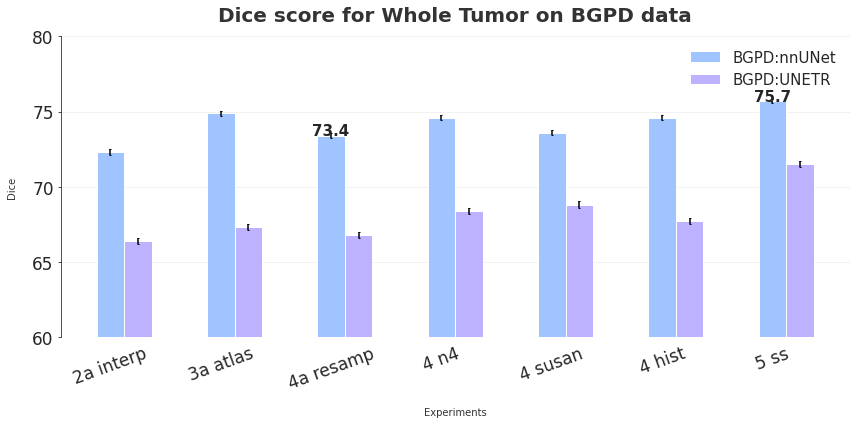

In [601]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(0,(len(df)-1)*0.8,0.8)
width = 0.2
plt.bar(x, df[df.columns[3]][1:],
        width, color='#A0C4FF', label='BGPD:nnUNet',yerr=bgpd_300_std[1:], capsize=1)
ax.text(2-0.4,df[df.columns[3]][3],df[df.columns[3]][3],
      horizontalalignment='center',
      weight='bold', fontsize=15
  )
plt.text(5-0.2,df[df.columns[3]][7],df[df.columns[3]][7], horizontalalignment='center',
      weight='bold', fontsize=15)

plt.bar(x+0.2, df[df.columns[5]][1:],
        width, color='#BDB2FF', label='BGPD:UNETR',yerr=bgpd_unetr_std[1:], capsize=1)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# plt.title('Dice score for Whole Tumor', fontsize=25)
# plt.xlabel(None)
plt.xticks(x, df.index[1:], fontsize=17, rotation=20)
plt.yticks(np.arange(0,100,5),fontsize=17)
sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15, loc='best')

ax.set_xlabel('Experiments', labelpad=15, color='#333333')
ax.set_ylabel('Dice', labelpad=15, color='#333333')
ax.set_title('Dice score for Whole Tumor on BGPD data', pad=15, color='#333333',
             weight='bold', fontsize=20)
plt.axis('tight')
plt.ylim(60, 80)
fig.tight_layout()

# Images with contours

In [488]:
from tqdm import tqdm
import ants
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.measure import find_contours
from scipy.ndimage import measurements
from skimage import exposure, img_as_ubyte

In [329]:
# best quality 
out_json = '/results/metrics/gbm/'
dataset = 'gbm'
task = 'gbm_4a_resamp'
fold = 'fold_0'
_columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
metrics_all = pd.DataFrame(columns = _columns)
for i,sub in tqdm((enumerate(os.listdir(out_json)))):
    for sub_t in os.listdir(os.path.join(out_json, sub)):
        if f'{task}_epoch' in sub_t:
            if fold in sub_t:
                metrics = json.load(open(os.path.join(out_json, sub, sub_t)))
                metrics = metrics[dataset][task][fold.replace('_', '=')]
                for each in _columns:
                    metrics_all.at[i,'Ids'] = sub
                    if each != 'Ids':
                        metrics_all.at[i,each] = np.round(metrics[each],3)

102it [00:00, 240.49it/s]


In [407]:
metrics_all.sort_values(by=['Dice_1'],ascending=False)[:5]

,Ids,Dice_1,Dice_2,Dice_3,Hausdorff95_1,Hausdorff95_2,Hausdorff95_3,Sensitivity_1,Sensitivity_2,Sensitivity_3,Specificity_1,Specificity_2,Specificity_3,Surface_dice_1,Surface_dice_2,Surface_dice_3,Precision_1,Precision_2,Precision_3
40,TCGA-02-0085,0.968,0.924,0.9,0.781,6.5,3.906,0.959,0.883,0.865,1.0,1.0,1.0,0.97,0.883,0.914,0.978,0.969,0.94
54,TCGA-12-1098,0.962,0.908,0.905,1.953,1.953,2.0,0.961,0.841,0.83,1.0,1.0,1.0,0.929,0.858,0.858,0.963,0.987,0.996
68,TCGA-08-0512,0.957,0.948,0.923,1.811,1.5,1.5,0.935,0.93,0.877,1.0,1.0,1.0,0.692,0.729,0.718,0.981,0.966,0.975
75,TCGA-02-0106,0.956,0.935,0.89,1.562,2.471,2.344,0.927,0.882,0.815,1.0,1.0,1.0,0.935,0.857,0.904,0.987,0.996,0.981
26,TCGA-12-1598,0.955,0.885,0.825,2.009,6.289,4.581,0.954,0.817,0.717,0.999,1.0,1.0,0.923,0.771,0.787,0.956,0.966,0.972


In [400]:
def draw_contours(image, mask):
    """Draw 3 x 4 matplotlib axes with imshow 3D slice and GTV contour overlay."""
    
#     assert(image.shape == mask.shape)
    contours = find_contours(mask[25:175,10:,])
    fig = plt.figure(figsize=(8,4))
    plt.axis('off')
    plt.imshow(image[25:175,10:,:], cmap='gray')
    for cont in range(len(contours)):
            plt.plot(contours[cont][:, 1], contours[cont][:, 0], c='r');
    plt.show()
def to_lbl(pred):
    enh = pred[2]
    c1, c2, c3 = pred[0] > 0.5, pred[1] > 0.5, pred[2] > 0.5
    pred = (c1 > 0).astype(np.uint8)
    pred[(c2 == False) * (c1 == True)] = 2
    pred[(c3 == True) * (c1 == True)] = 3

    components, n = measurements.label(pred == 3)
    for et_idx in range(1, n + 1):
        _, counts = np.unique(pred[components == et_idx], return_counts=True)
        if 1 < counts[0] and counts[0] < 8 and np.mean(enh[components == et_idx]) < 0.9:
            pred[components == et_idx] = 1

    et = pred == 3
    if 0 < et.sum() and et.sum() < 73 and np.mean(enh[et]) < 0.9:
        pred[et] = 1
    pred = np.transpose(pred, (2, 1, 0)).astype(np.uint8)
    return pred


(200, 200, 143)
(200, 200, 143, 4)
[91]


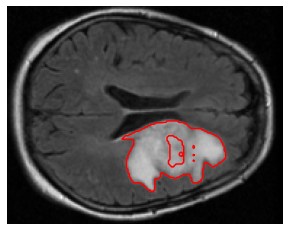

In [401]:
fname = 'TCGA-02-0085'
img = nib.load(f"/data/private_data/gbm/gbm_4a_resamp/images/{fname}.nii.gz").get_fdata().astype(np.float32)
label = nib.load(f"/data/private_data/gbm/gbm_4a_resamp/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
predict = np.load(f"/results/gbm_infer/gbm_4a_resamp/predictions_best_epoch=197-dice_mean=78_14_task=38_fold=0_tta/{fname}.npy.npz")['arr_0']
mask = to_lbl(predict)
print(mask.shape)
print(img.shape)
l = np.argsort(label.sum(axis=(0,1)))[-1:]
print(l)
draw_contours(img[:, :, l, 0],mask[:,:,l].squeeze())

In [443]:
gbm_to_bgpd =  np.array( [0.017,
0.025,
0.021,
-0.002,
0.021,
0.018,
0.016,
-0.008])

gbm_100 =  np.array( [42.3,
83.1,
83.6,
83.7,
82.7,
83.8,
82.1,
86.0])


bgpd_to_gbm =  np.array([0.008,
0.027,
0.022,
0.019,
0.023,
0.025,
0.015,
0.007])

bgpd_100 = np.array(
[34.1,
70.2,
71.6,
71.4,
70.6,
70.9,
72.0,
75.3])



list_tcs = ['1 reg',
'2a interp',
'3a atlas',
'4a resamp',
'4 n4',
'4 susan',
'4 hist',
'5 ss']

bgpd_300 = np.array( [
35.9,
72.3,
74.9,
73.4,
74.6,
73.6,
74.6,
75.7,])

gbm_300 = np.array( [
    
43.6,
84.8,
84.6,
85.0,
82.4,
84.5,
83.3,
86.6,])

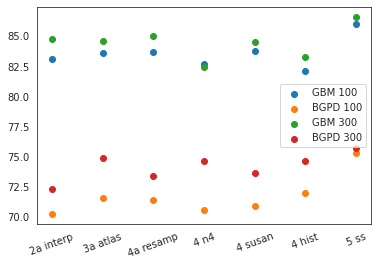

In [444]:
# plt.plot(np.arange(1,8),(gbm_to_bgpd*100+gbm_100)[1:] )
# plt.plot(np.arange(1,8),(bgpd_to_gbm*100+bgpd_100 )[1:])
plt.scatter(np.arange(1,8), (gbm_100)[1:], label = 'GBM 100')
plt.scatter(np.arange(1,8), bgpd_100[1:], label = 'BGPD 100')

plt.scatter(np.arange(1,8), (gbm_300)[1:], label = 'GBM 300')
plt.scatter(np.arange(1,8), bgpd_300[1:], label = 'BGPD 300')
# plt.hlines(0,0, 8)
plt.xticks(np.arange(1,8),list_tcs[1:],  rotation=20);
plt.legend();


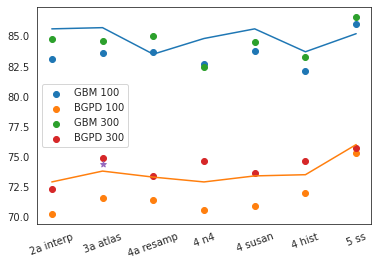

In [445]:
plt.plot(np.arange(1,8),(gbm_to_bgpd*100+gbm_100)[1:] )
plt.plot(np.arange(1,8),(bgpd_to_gbm*100+bgpd_100 )[1:])
plt.scatter(np.arange(1,8), (gbm_100)[1:], label = 'GBM 100')
plt.scatter(np.arange(1,8), bgpd_100[1:], label = 'BGPD 100')

plt.scatter(np.arange(1,8), (gbm_300)[1:], label = 'GBM 300')
plt.scatter(np.arange(1,8), bgpd_300[1:], label = 'BGPD 300')
plt.scatter(2, 74.4, marker ='*')
# plt.hlines(0,0, 8)
plt.xticks(np.arange(1,8),list_tcs[1:],  rotation=20);
plt.legend();